### Business Problem

CBC sent mailings to its club members each month containing the latest offerings. On the surface, CBC appreared successful: mailings volume increase, book selection was diversifying and growing, and their customer database was increasing. However, their bottom line profits were falling. The decreasing profits lef CBC to revisit their original plan of using database marketing to improve mailing yields and to stay profitable.

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import scikitplot as skplt

In [2]:
df = pd.read_csv("Charles_Book_Club.csv")

### Data Exploration 

In [3]:
df.head(10)

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,ItalCook,ItalAtlas,ItalArt,Florence,Related purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
0,1,25,1,297,14,2,22,0,1,1,...,0,0,0,0,0,5,4,2,0,1
1,2,29,0,128,8,2,10,0,0,0,...,0,0,0,0,0,4,3,2,0,1
2,3,46,1,138,22,7,56,2,1,2,...,1,0,0,0,2,4,4,3,0,1
3,4,47,1,228,2,1,2,0,0,0,...,0,0,0,0,0,5,1,1,0,1
4,5,51,1,257,10,1,10,0,0,0,...,0,0,0,0,0,5,3,1,0,1
5,6,60,1,145,6,2,12,0,0,0,...,0,0,0,0,0,4,2,2,0,1
6,7,61,1,190,16,1,16,0,0,0,...,0,0,0,0,1,4,4,1,0,1
7,8,79,1,187,14,1,14,1,0,0,...,0,0,0,0,0,4,4,1,0,1
8,9,81,1,252,10,1,10,0,0,0,...,0,0,0,0,0,5,3,1,0,1
9,10,90,1,240,6,3,20,0,0,1,...,0,0,0,0,0,5,2,3,0,1


In [4]:
df['Florence'].value_counts()

0    3662
1     338
Name: Florence, dtype: int64

In [5]:
df.shape

(4000, 24)

In [6]:
df.columns

Index(['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks',
       'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeoBks',
       'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence', 'Related purchase',
       'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence'],
      dtype='object')

### k-NN Model

In [10]:
kNN_filtered = df[['R', 'F', 'M', 'FirstPurch', 'Related purchase', 'Florence']]

In [11]:
x = kNN_filtered.drop(['Florence'], axis = 1)
y = kNN_filtered['Florence']

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [13]:
scaler = preprocessing.StandardScaler().fit(x)

In [14]:
X_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [15]:
results = []

for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    results.append({
        'k': k,
        'Accuracy': accuracy_score(y_valid, knn.predict(x_valid))
    })
    
results = pd.DataFrame(results)

In [16]:
train_pred = knn.predict(X_train)
val_pred = knn.predict(x_valid)

In [17]:
print("Training recall: ", metrics.recall_score(y_train, train_pred))
print("Validation recall: ", metrics.recall_score(y_valid, val_pred))

print("\n")

print("Training precision: ", metrics.precision_score(y_train, train_pred))
print("Validation precision: ", metrics.precision_score(y_valid, val_pred))

print("\n")

print("Training accuracy: ", metrics.accuracy_score(y_train, train_pred))
print("Validation accuracy: ", metrics.accuracy_score(y_valid, val_pred))

print("\n")

y_train_prob = knn.predict_proba(X_train)
y_val_prob = knn.predict_proba(x_valid)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print("Training AUC: ", metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print("Validation AUC: ", metrics.auc(fpr, tpr))

Training recall:  0.8965384615384615
Validation recall:  0.8691148775894538


Training precision:  0.7568181818181818
Validation precision:  0.6945071482317532


Training accuracy:  0.8014046039797112
Validation accuracy:  0.7520473157415832


Training AUC:  0.8950754461294842
Validation AUC:  0.844267642104984


<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

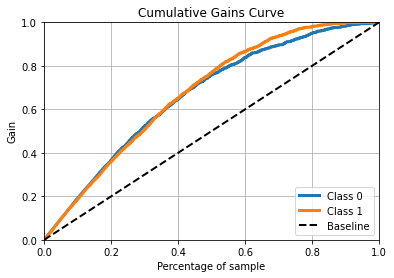

In [18]:
skplt.metrics.plot_cumulative_gain(y_valid,y_val_prob)

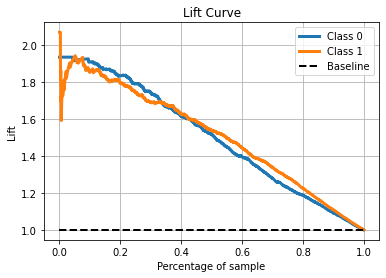

In [19]:
skplt.metrics.plot_lift_curve(y_valid,y_val_prob)
plt.legend(loc='best')

In [114]:
results

,k,Accuracy
0,1,0.829390
1,2,0.827116
2,3,0.810737
3,4,0.814832
4,5,0.796178
5,6,0.800728
6,7,0.775705
7,8,0.787989
8,9,0.769791
9,10,0.780710
